In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

# sklearn models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

# model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [62]:
url = "https://www.kaggle.com/ronitf/heart-disease-uci/version/1?select=heart.csv"
df = pd.read_csv('heart.csv', index_col=0)
df.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
df.shape

(303, 13)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 63 to 57
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       303 non-null    int64  
 1   cp        303 non-null    int64  
 2   trestbps  303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 33.1 KB


In [65]:
new = df[['cp', 'slope', 'ca', 'thal']].copy()

In [66]:
new.head

<bound method NDFrame.head of      cp  slope  ca  thal
age                     
63    3      0   0     1
37    2      0   0     2
41    1      2   0     2
56    1      2   0     2
57    0      2   0     2
57    0      1   0     1
56    1      1   0     2
44    1      2   0     3
52    2      2   0     3
57    2      2   0     2
54    0      2   0     2
48    2      2   0     2
49    1      2   0     2
64    3      1   0     2
58    3      2   0     2
50    2      1   0     2
58    2      2   0     2
66    3      0   0     2
43    0      2   0     2
69    3      2   2     2
59    0      1   0     3
44    2      2   0     2
42    0      2   0     2
61    2      1   0     2
40    3      2   0     3
71    1      2   2     2
59    2      2   0     2
51    2      2   0     2
65    2      2   1     2
53    2      0   0     2
41    1      2   1     2
65    0      2   0     3
44    1      2   0     2
54    2      0   1     2
51    3      2   1     2
46    2      0   0     2
54    2      2   0  

In [67]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(new))

# Imputation removed column names; put them back
imputed_X_train.columns = new.columns
new.head()

,cp,slope,ca,thal
age,,,,
63,3,0,0,1
37,2,0,0,2
41,1,2,0,2
56,1,2,0,2
57,0,2,0,2


In [68]:
# cols_with_missing = ['cp', 'slope', 'ca', 'thal']

from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(df))

# Imputation removed column names; put them back
imputed_X_train.columns = df.columns

pd.set_option('display.max_rows', 500)
df.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

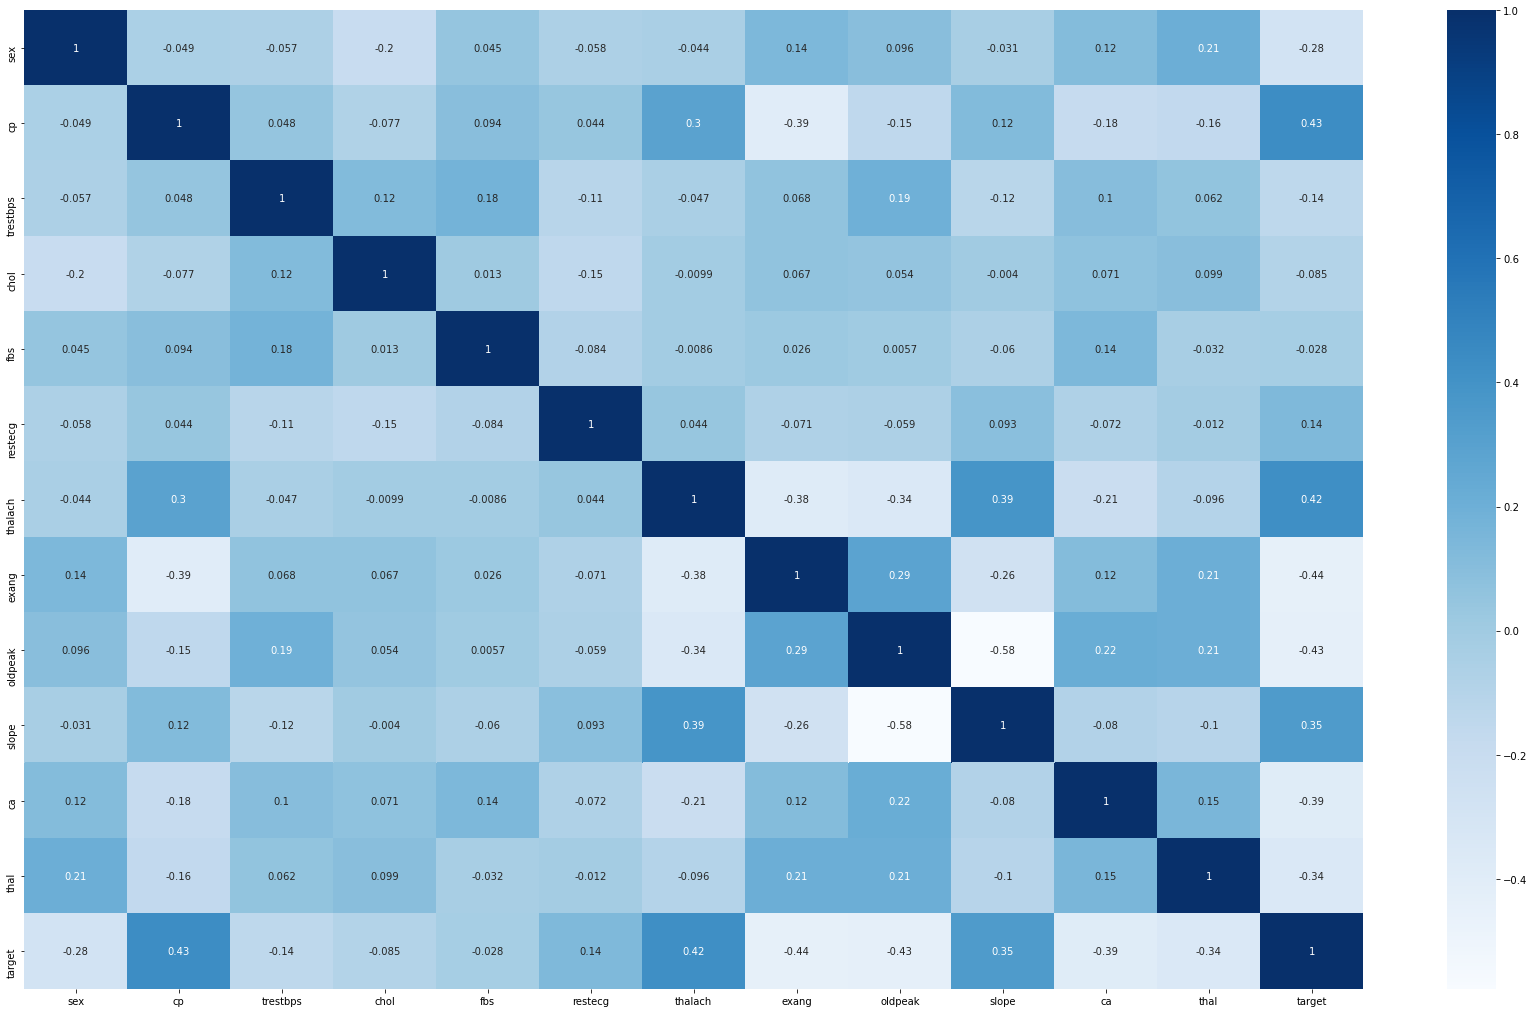

In [69]:
plt.subplots(figsize=(30, 18))
sns.heatmap(df.corr(), annot=True,  cmap='Blues')

In [70]:
x = df.drop("target", axis=1)

y = df["target"]

In [71]:
x.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2
41,0,1,130,204,0,0,172,0,1.4,2,0,2
56,1,1,120,236,0,1,178,0,0.8,2,0,2
57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [73]:
np.random.seed(42)

# Split into train & test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

In [74]:
len(x_train)

242

In [75]:
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "Random Forest regressor": RandomForestRegressor()
          }

# Creating a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):

    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():

        # Fit the model to the data
        model.fit(x_train, y_train)

        # append the evaluated score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [76]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\sansk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'Random Forest': 0.8360655737704918,
 'Random Forest regressor': 0.5150894396551725}

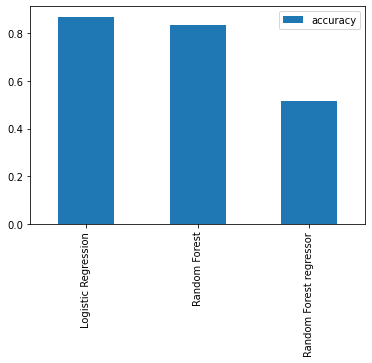

In [77]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [81]:
# taken from kaggle or hyperparameter tuning(not really needed)
grid_1 = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

grid_2 = {"n_estimators": np.arange(10,100,10),
          "max_depth": [None,3,5,7,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features": [0.5,1,"sqrt","auto"],
          "max_samples": [100]}

In [96]:
np.random.seed(42)

model_1 = RandomizedSearchCV(LogisticRegression(),
                             param_distributions=grid_1,
                             cv=5,
                             n_iter=50,
                             verbose=True)
model_1.fit(x_train, y_train)

C:\Users\sansk\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [97]:
model_1.score(x_test, y_test)

0.8524590163934426

In [98]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
model_2 = RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=grid_2,
                             cv=5,
                             n_iter=100,
                             verbose=True)

# Fitting random hyperparameter search model for RandomForestClassifier()
model_2.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 7, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [100],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [99]:
final_score=model_2.score(x_test, y_test)
final_score

0.8688524590163934